In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC,LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split,learning_curve
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,precision_score,recall_score,f1_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [2]:

data=pd.read_csv('/home/jiayi/5moU/data/DL_fromTombo/Tombo_all_avg.csv')
data

,indx,kmer,avg_mean,avg_std,avg_mdintense,avg_length2,label
0,20,CATCT,-0.379295,0.059457,-0.386073,18.6,1
1,22,TCTTC,-0.224518,0.079366,-0.226347,21.8,1
2,23,CTTCG,-0.027033,0.106017,-0.016552,24.2,1
3,35,CGTGG,0.135500,0.146305,0.127863,19.6,1
4,44,CCTGC,-0.297275,0.098792,-0.307865,59.0,1
...,...,...,...,...,...,...,...
1822819,350,GCTGG,0.251371,0.097341,0.250863,205.6,0
1822820,365,GATCC,-0.242580,0.199999,-0.230983,8.0,0
1822821,374,GATCC,-0.153419,0.253634,-0.074312,570.2,0
1822822,377,CCTGA,-0.008397,0.117552,-0.003787,137.6,0


In [3]:
X=data[['avg_mean','avg_std','avg_mdintense','avg_length2']]  # Features
y=data['label']  # Labels

X_train,X_test,y_train,y_test = train_test_split(X, y,train_size = 0.001,test_size = 0.001)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [4]:
###LR
logreg = LogisticRegression(random_state=16)
logreg.fit(X_train, y_train)

###RF
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)


### SVM
svc = SVC(probability=True)
svc.fit(X_train,y_train)

###Xgboost
xgboost = XGBClassifier()
xgboost.fit(X_train, y_train)

###knn
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsClassifier()

AUC of LR:0.49876771410967347
AUC of RF:0.5079143561306223
AUC of SVM:0.5
AUC of xgboost:0.5089802834257547
AUC of knn:0.517096426370918


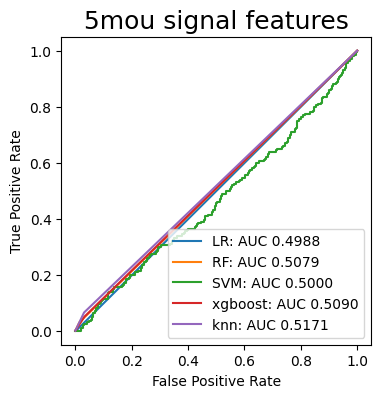

<Figure size 640x480 with 0 Axes>

In [5]:
### visualization
plt.figure(figsize = (4,4))

#for LR
fpr,tpr,thresh = roc_curve(y_test, logreg.predict(X_test))
auc = roc_auc_score(y_test, logreg.predict(X_test))
print("AUC of LR:"+str(auc))
plt.plot(fpr,tpr,label='LR: AUC %0.4f' % auc, lw = 1.5)

#for RF
fpr,tpr,thresh = roc_curve(y_test, clf.predict(X_test))
auc = roc_auc_score(y_test, clf.predict(X_test))
print("AUC of RF:"+str(auc))
plt.plot(fpr,tpr,label='RF: AUC %0.4f' % auc, lw = 1.5)


#for svm
fpr,tpr,thresh = roc_curve(y_test, svc.predict_proba(X_test)[:,1])
auc = roc_auc_score(y_test, svc.predict(X_test))
print("AUC of SVM:"+str(auc))
plt.plot(fpr,tpr,label='SVM: AUC %0.4f' % auc, lw = 1.5)

#for xgboost
fpr,tpr,thresh = roc_curve(y_test, xgboost.predict(X_test))
auc = roc_auc_score(y_test, xgboost.predict(X_test))
print("AUC of xgboost:"+str(auc))
plt.plot(fpr,tpr,label='xgboost: AUC %0.4f' % auc, lw = 1.5)

#for knn
fpr,tpr,thresh=roc_curve(y_test,knn.predict(X_test))
auc = roc_auc_score(y_test, knn.predict(X_test))
print("AUC of knn:"+str(auc))
plt.plot(fpr,tpr,label='knn: AUC %0.4f' % auc, lw = 1.5)





plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('5mou signal features', size = 18)
plt.legend(loc="lower right")
plt.show()
plt.savefig('/home/jiayi/5moU/Results/5mou_signal_ml_roc.png')

In [ ]:
# Stratified K-Fold CV
from numpy import mean
from numpy import std
from sklearn.model_selection import StratifiedKFold,cross_val_score
# https://deepchecks.com/top-techniques-for-cross-validation-in-machine-learning/
linear_reg=LogisticRegression()
Stratified_cross_validate=StratifiedKFold(n_splits=10)
score_LR=cross_val_score(linear_reg,X,y,cv=Stratified_cross_validate)
print("Cross Validation Scores for LR with stratified K-fold CV are {}".format(score_LR))
#print("Average Cross Validation score :{}".format(score.mean()))
print('Accuracy: %.3f (%.3f)' % (mean(score_LR), std(score_LR)))


from sklearn.model_selection import LeavePOut,cross_val_score
clf=RandomForestClassifier(n_estimators=100)
leave_p_out=LeavePOut(p=2)
leave_p_out.get_n_splits(X)
score_RF=cross_val_score(clf,X,y,cv=leave_p_out)
print("Cross Validation Scores are {}".format(score_RF))
print('Accuracy: %.3f (%.3f)' % (mean(score_RF), std(score_RF)))




Cross Validation Scores for LR with stratified K-fold CV are [0.89167394 0.89182206 0.8917672  0.89165199 0.89155814 0.89164043
 0.89172272 0.89161848 0.89140453 0.89144842]
Accuracy: 0.892 (0.000)


In [ ]:
#K-Fold cross validation https://deepchecks.com/top-techniques-for-cross-validation-in-machine-learning/
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score,KFold

###LR
logreg = LogisticRegression(random_state=16)
#logreg.fit(X_train, y_train)
K_fold_validation=KFold(n_splits=10)
score_LR=cross_val_score(logreg,X,y,cv=K_fold_validation)
#print("Cross Validation Scores are {}".format(score))
#print("Average Cross Validation score :{}".format(score.mean()))
print("Cross Validation Scores for LR-Kfold are {}".format(score_LR))
print('Accuracy of LR-Kfold: %.3f (%.3f)' % (mean(score_LR), std(score_LR)))





In [ ]:
###RF
clf=RandomForestClassifier(n_estimators=100)
K_fold_validation=KFold(n_splits=10)
score_RF=cross_val_score(clf,X,y,cv=K_fold_validation)
#print("Cross Validation Scores are {}".format(score))
#print("Average Cross Validation score :{}".format(score.mean()))
print("Cross Validation Scores for RF-Kfold are {}".format(score_LR))
print('Accuracy of RF-Kfold: %.3f (%.3f)' % (mean(score_RF), std(score_RF)))


